#**Home Loan Approval - Data Analysis using Python**

**Authors: Amir Awawdi Yosef, Joseph Siaw Akowuah**.


#**1. Project Overview**



**Dataset:** Home Loan Approval for Comfort LLC

Source: https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval

**Background:**

Comfort LLC is a finance company that specializes in all home-related loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan then, the company validates the customer's eligibility before the loan is granted. 

**Problem description:**

*   The new management of Comfort LLC has informed Amir and Joseph, the firm’s data analyst team, to conduct exploratory and prescriptive analysis that will guide the company's decision to enhance its operations. The following are key to the company going forward. 

*   Firstly, there is a need for data analysis to suggest methods to increase the profitability of the company. Specifically, management is considering offering more loans to applicants who are married or are living with family. Management presupposes that such applicants have the motivation to require more home loans and larger amounts hence an increase in the company’s profit in the long run. In addition, management will also require information regarding the category of applicants which were rejected by the old management. Comfort LLC is not sure if this is a good idea yet. Joseph and Amir would need to provide insights to guide a data-driven decision. 

*   Secondly, Comfort LLC seeks to automate the process of approving the eligibility of a loan (in real-time) based on the customer's details provided while filling out the online application form. 
These details are: 

>  
*   Gender: Male / Female 
*   Marital Status: Married - Yes or No
*   Education: Graduate / Not Graduate
*   Number of Dependents: 0,1,2 and +3
*   Income (USD).
*   Loan amount (USD in thousands).
*   Credit History.
*   Property's area: Rural / Urban / Semi-urban

Management has provided data identifying the customer segments eligible for loan amounts to target these customers specifically.


**Research Objectives:**



> **Exploratory Data Analysis**
1. What are the demographics of previous successful loan applicants  ?
2. Do married people request more loans as compared to unmarried individuals ? Which group request higher loans ?
3.  Do people with dependents request more loans as compared to individuals with no dependents ? Which group request higher loans ? 
4.   Which property area is preferred by the loan applicants ?

**Automating Loan Approval Process**


5.   Using marital and dependecy status, build a model that automates the loan approval process by determining the applicant's eligibility. 





#**2. Concept Overview**

 
This section outlines and operationalizes the concepts that are used in this analysis. 

Exploratory Analysis: Exploratory analysis is an approach to data analysis that focuses on summarising and visualising data to understand its main characteristics, patterns, and relationships. It is typically used as a preliminary step in data analysis to gain insights into the data and generate hypotheses for further investigation.

Prescriptive Analysis: Prescriptive analysis is a type of data analysis that focuses on recommending actions based on the insights gained from exploratory analytics. It involves using advanced statistical and mathematical techniques, as well as machine learning algorithms, to provide decision-makers with specific recommendations for how to act on the data.

Automation:  Automation refers to the use of technology and/ or machines to perform tasks or processes that would otherwise be carried out by humans. The purpose of automation is to increase efficiency, reduce costs, and improve accuracy and consistency in the execution of tasks.

#**3. Data Overview and Preparation**
This section elaborates on the methods used to gather, clean and structure the data in order to prepare it for analysis according to the concepts explained previously. This process typically involves the following tasks:



1. Gathering and collecting the data from the company's customer database to be used for analysis and building a function for loan approval automation. The discussed dataset is collected from online applications of customers who have applied for loans. The data contains the demographics of the loan applicants as well.

2. Cleaning the data by identifying errors and performing manipulations to create a complete and accurate data set.

## Import, Gather, Load and Clean

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Suppress all warnings, including the RuntimeWarning
import warnings
warnings.filterwarnings("ignore")

# The data set had been downloaded from Kaggle then uploaded to the root directory on my google colab
# Make sure the data set is uploaded in the Files of this notebook
loan_data = pd.read_csv('/content/loan_sanction.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Dataframe Info, checking NaN (NUll) values and type per column
print("Table dimensions, Name and type of columns and non-Null values count pre-celaning:\n")
loan_data.info()  


Table dimensions, Name and type of columns and non-Null values count pre-celaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Show the number of unique values in each column
print("Unique values per column pre-cleaning:\n")
loan_data.nunique()

Unique values per column pre-cleaning:



Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
# Counting Null values
print("Null values per column pre-cleaning:\n")
loan_data.isna().sum()

Null values per column pre-cleaning:



Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Removing Null values
loan_data.dropna(inplace=True)
print("Blank values per column after cleaning:\n")
loan_data.isna().sum()

Blank values per column after cleaning:



Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# df Info, checking NaN (NUll) values and type per column
print("Table dimensions, Name, type and non-Null values per column after cleaning:\n")
loan_data.info()  

Table dimensions, Name, type and non-Null values per column after cleaning:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


After cleaning the data set, the remaining entries are substantial for accurate analysis.

The prepared loan_data dataframe contains 480 entries and the following columns:

Categorial columns:

1.   Loan_ID - contains 480 uniqe entries.
2.   Gender
3.   Married
4.   Dependents
5.   Education
6.   Self_Employed
7.   Property_Area
8.   Loan_Status

Numerical columns:

9.   ApplicantIncome
10.  CoapplicantIncome
11.  LoanAmount
12.  Loan_Amount_Term 
13.  Credit_History




3. Organising, modelling and structuring the data to fit the required analysis.

4. Transforming the data by creating new fields or columns for enhancing the existing data prior to optimization.

5. Profiling and exploring the collected data to better understand what it contains and how it can be analysed to meet the company's needs. Initial profiling of identifiable patterns, inconsistencies and anomalies.

##Univariate Analysis - Break down per column:



Plot function for categorical (Objects) variables:

In [ ]:
def plot_stacked_bar(df, x, y):
    sns.set(style="darkgrid")  # Set the style of the plot
    plt.figure(figsize=(8, 5))
    bar_plot = sns.histplot(df,x=x,hue=y, palette='tab20')
    total_counts = df[x].value_counts().sum()

    for p in bar_plot.patches:
      xloc = p.get_x() + p.get_width()/2
      yloc = p.get_height() - 1.2
      percentage = format((p.get_height()/total_counts), '.1%')
      bar_plot.annotate(percentage, (xloc, yloc), xytext=(0, 0),
                        textcoords='offset points', ha='center', va='center', color='black', size=11, weight='bold')
    

    plt.xticks(rotation=45 , size=13)
    plt.yticks(size=13)
    plt.xlabel(f'{x}', size=13)
    plt.ylabel('Number of Loans', size=13)
    plt.title(f'Distribution of Loans per {x}', size=15, weight='bold')  


Plot function for numerical variables considerd as categorical:

In [ ]:
def plot_categ_num(df, x, y ):

    bar_plot = df[x].value_counts(normalize=False).sort_values(ascending=True).plot(kind='bar', color='#4B0082')

    total_counts = df[x].value_counts().sum()

    approval_rate = 0
    for p in bar_plot.patches:
        percentage = format((p.get_height()/total_counts), '.1%')
        bar_plot.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), 
                          textcoords='offset points', color='black', size=12, weight='bold')

    plt.xticks(rotation=45 , size=13)
    plt.ylabel('Number of Loans', size=13)
    plt.title(f'Distribution of Loans per {x}', size=15, weight='bold')

Plot function for numerical variables:

In [ ]:
def plot_num(df,col,hue):
    sns.set(style="darkgrid")  # Set the style of the plot
    fig , ax = plt.subplots(1,2,figsize=(15,4))
    sns.histplot(df,x=col,hue = hue,ax=ax[0], palette='RdPu')
    sns.boxplot(df,x=col, hue=hue,ax=ax[1], palette='RdPu')
    ax[0].set_title(f'Distribution of Loans per {col}', size=15, weight='bold')
    ax[1].set_title(f'Distribution of Loans per {col} BoxPlot', size=15, weight='bold')
    ax[0].set_xlabel(f'{col} [USD]')
    ax[1].set_xlabel(f'{col} [USD]')

**Loan_Status -** contains 2 unique categories: "Y" and "N" replaced with "Approved" and "Rejected" accordingly

In [ ]:
loan_data['Loan_Status'].value_counts() 

Y    332
N    148
Name: Loan_Status, dtype: int64

In [ ]:
# Replace Yes(Y) and No(N) with "Approved" and "Rejected" accordingly
loan_data.loc[loan_data['Loan_Status'] == 'Y', 'Loan_Status'] = 'Approved'
loan_data.loc[loan_data['Loan_Status'] == 'N', 'Loan_Status'] = 'Rejected'
loan_data['Loan_Status'].value_counts() 

Approved    332
Rejected    148
Name: Loan_Status, dtype: int64

Text(0.5, 1.0, 'Loan approval rate')

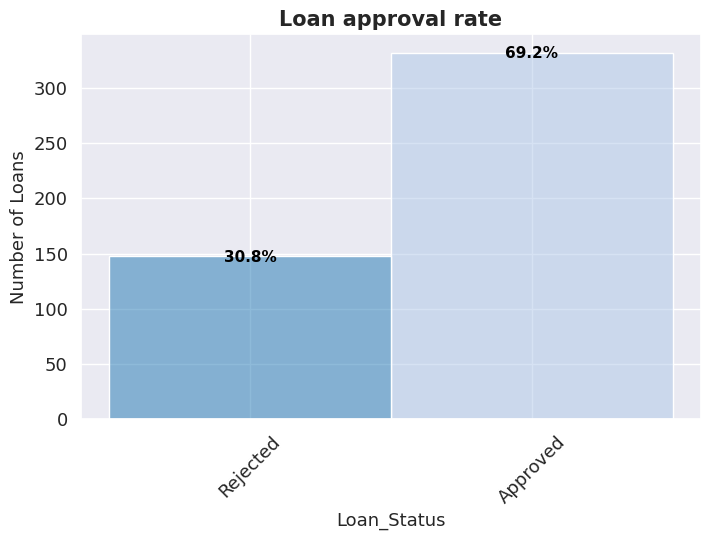

In [ ]:
plot_stacked_bar(loan_data,'Loan_Status','Loan_Status')
plt.legend().remove()
plt.title(f'Loan approval rate', size=15, weight='bold')  


As observed in the figure above, loan applications have an approval rate of  69.2%.

**Gender -** contains 2 unique categories: Male and Female

In [ ]:
loan_data['Gender'].value_counts() 

Male      394
Female     86
Name: Gender, dtype: int64

Text(2.2, 105, 'Probability of approval \n [Female]:0.63')

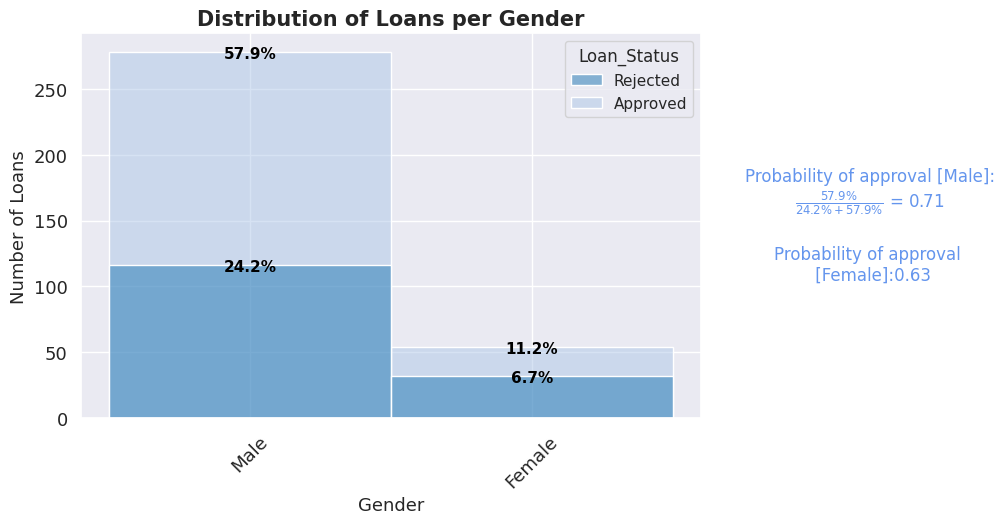

In [ ]:
plot_stacked_bar(loan_data,'Gender','Loan_Status')
        
# Add text with a calculation of the loan approval rate
text = f"Probability of approval [Male]:\n" + r'$\frac{57.9\%} {24.2\% + 57.9\%}$' + f" = {round(57.9/(24.2 +  57.9),2)}"
plt.text(2.2, 160, text, fontsize=12, ha='center', color='#6495ED')

text = f"Probability of approval \n [Female]:" + f"{round(11.2/(6.7 +  11.2),2)}"
plt.text(2.2, 105, text, fontsize=12, ha='center', color='#6495ED')

According to the provided graph, it is evident that 57.9% of total applicants granted loans are males. Out of the male applicants, 24.2% are rejected, leading us to conclude, based on the calculation displayed with the plot, that the probability for a male to be approved for a loan is approximately 71%. Furthermore, among all applicants, 17.9% are females with a probability of approval for a loan at 63%. 6.7% of the total applicants rejected were females.

**Married -** contains 2 uniqe categories: "Yes" and "No" replaced with "Married" and "Not Married" accordingly

In [ ]:
loan_data['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [ ]:
# Replace Yes and No with "Married" and "Not Married" accordingly
loan_data.loc[loan_data['Married'] == 'Yes', 'Married'] = 'Married'
loan_data.loc[loan_data['Married'] == 'No', 'Married'] = 'Not married'
loan_data['Married'].value_counts() 

Married        311
Not married    169
Name: Married, dtype: int64

Text(2.02, 105, 'Probability of approval \n [Not married]:0.62')

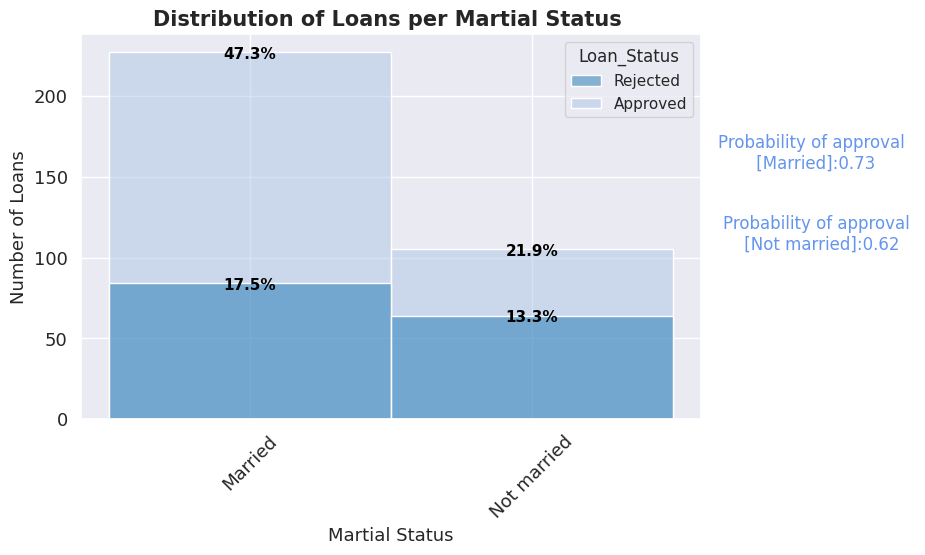

In [ ]:
plot_stacked_bar(loan_data,'Married','Loan_Status')
plt.title('Distribution of Loans per Martial Status ', size=15, weight='bold')
plt.xlabel('Martial Status', size=13)

# Add text with a calculation of the loan approval rates
text = f"Probability of approval \n [Married]:" + f"{round(47.3/(17.5 +  47.3),2)}"
plt.text(2, 155, text, fontsize=12, ha='center', color='#6495ED')

text = f"Probability of approval \n [Not married]:" + f"{round(21.9/(13.3 +  21.9),2)}"
plt.text(2.02, 105, text, fontsize=12, ha='center', color='#6495ED')

The majority of applicants are married people adding up to nearly 65% of all sumbitted applications, 47.3% approved plus 17.5% rejected.
The figure above show clearly that Married people have a higher chance to receive a loan with a probability of 73%, which is higher than  unmarried applicants with a probability of 62%.

**Dependents -** contains 4 unique values (considered as categories): 0,1, 2 and +3

In [ ]:
loan_data['Dependents'].value_counts() 

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

Text(4.55, 35, 'Probability of approval \n [+3 dependents]: 0.68')

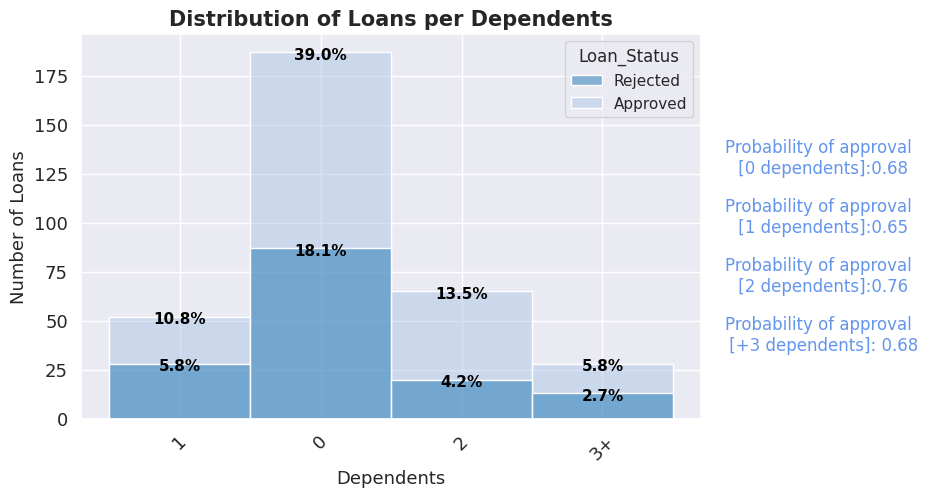

In [ ]:
plot_stacked_bar(loan_data,'Dependents','Loan_Status')

# Add text with a calculation of the loan approval rates
text = f"Probability of approval \n [0 dependents]:" + f"{round(39.0/(18.1 +  39.0),2)}"
plt.text(4.55, 125, text, fontsize=12, ha='center', color='#6495ED')

text = f"Probability of approval \n [1 dependents]:" + f"{round(10.8/(5.8 +  10.8),2)}"
plt.text(4.55, 95, text, fontsize=12, ha='center', color='#6495ED')

text = f"Probability of approval \n [2 dependents]:" + f"{round(13.5/(13.5 +  4.2),2)}"
plt.text(4.55, 65, text, fontsize=12, ha='center', color='#6495ED')

text = f"Probability of approval \n [+3 dependents]: " + f"{round(5.8/(5.8 +  2.7),2)}"
plt.text(4.55, 35, text, fontsize=12, ha='center', color='#6495ED')

The "Distribution of Loans per Dependents" figure indicates that the highest percentage, nearly 40% of total sumbitted applications which receive approval are those without dependents. This observation could be inferred from the fact that this group of applicants submitted the highest number of applications as compared to those with dependents. 274 applications were submitted by people with no dependents compared to 85 application by those with 2 dependest. However, in terms of probability, the group with the highest approval are those with 2 dependest, amounting to 0.76. 

**Dependency -** contains 2 uniqe categories: "No dependents" and "Have dependents". This "dependency" column is recoded from the "Dependents column. 

In [ ]:
# Create the new column called "Dependency" to categorize the Dependents column into two unique categories.
loan_data['Dependency'] = loan_data['Dependents'].apply(lambda x: 'Have dependents' if x > '0' else 'No dependent')
loan_data['Dependency'].value_counts() 

No dependent       274
Have dependents    206
Name: Dependency, dtype: int64

Text(2, 85, 'Probability of approval \n [No dependents]: 0.68')

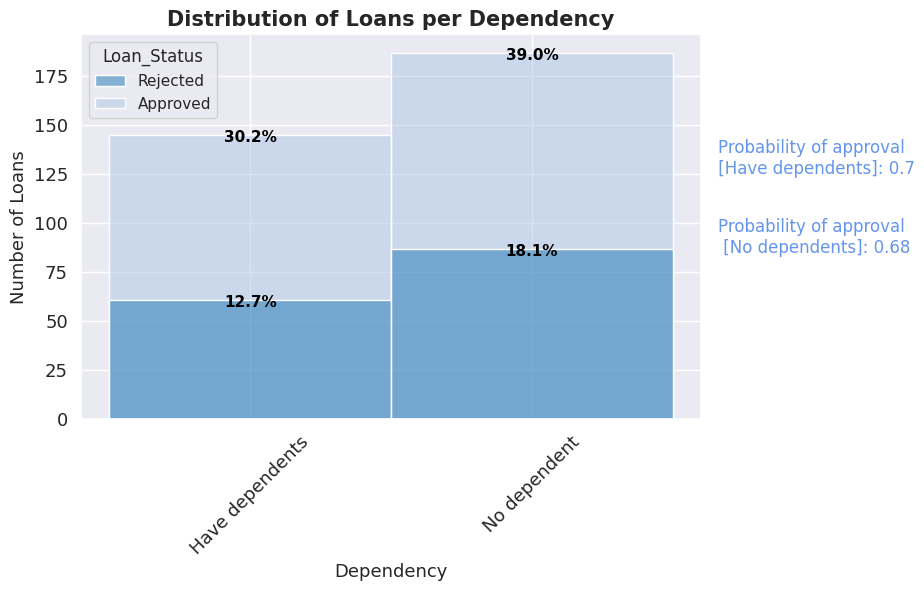

In [ ]:
plot_stacked_bar(loan_data,'Dependency','Loan_Status')

# Add text with a calculation of the loan approval rates
text = f"Probability of approval \n [Have dependents]: " + f"{round(30.2/(30.2+12.7),2)}"
plt.text(2, 125, text, fontsize=12, ha='center', color='#6495ED')

text = f"Probability of approval \n [No dependents]: " + f"{round(39.0/(39.0 +  18.1),2)}"
plt.text(2, 85, text, fontsize=12, ha='center', color='#6495ED')

This analysis offers a fresh perspective on the loan approval rate or probability of approval, highlighting a notable reduction in the disparity between the two groups compared to the previous analysis. In the earlier assessment, the group of applicants with dependents was divided into three subcategories based on the number of dependents, whereas the current findings indicate a more comparable probability between the two main groups. The depicted figure presents compelling evidence that the approval rate for loans remains relatively consistent regardless of the dependency status of the applicants. Both groups exhibit a probability of approval ranging from approximately 68% to 70%.

**Education -** contains 2 unique categories: "Graduate" and "Not Graduate"

In [ ]:
loan_data['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

Text(2, 110, 'Probability of approval \n [Not Gradurte]: 0.63')

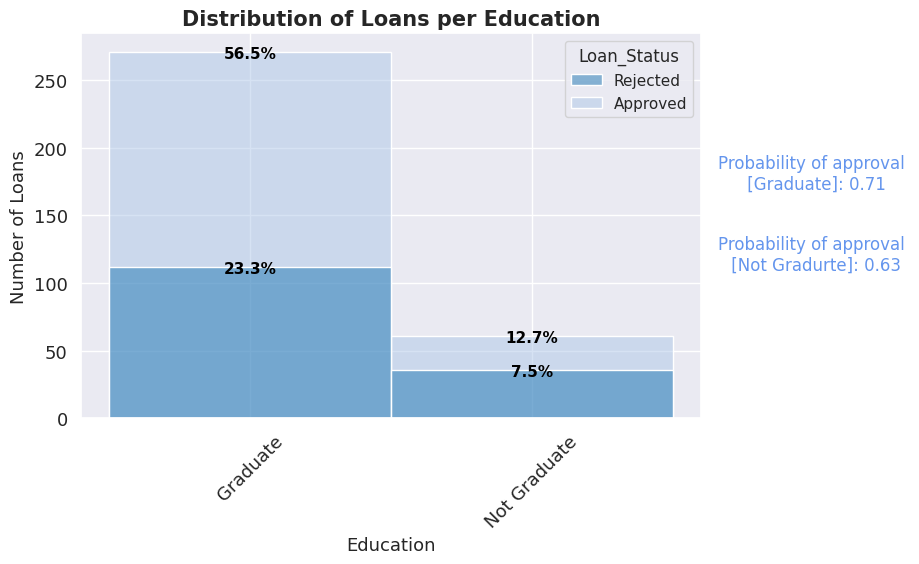

In [ ]:
plot_stacked_bar(loan_data,'Education','Loan_Status')

# Add text with a calculation of the loan approval rates
text = f"Probability of approval \n [Graduate]: " + f"{round(56.5/(56.5+23.3),2)}"
plt.text(2, 170, text, fontsize=12, ha='center', color='#6495ED')

text = f"Probability of approval \n [Not Gradurte]: " + f"{round(12.7/(12.7 +  7.5),2)}"
plt.text(2, 110, text, fontsize=12, ha='center', color='#6495ED')

A notable observation is that a significant majority, approximately 80%, of the applicants are classified as Graduates. Among the Graduates, the probability of approval stands at 0.71, surpassing the 0.63 probability of approval for the remaining 20% of applicants categorized as Ungraduates. It is worth noting that within the Ungraduate group, 7.5% of applicants face rejection.

**Self_Employed -** contains 2 unique categories: "Yes" and "No"

In [ ]:
loan_data['Self_Employed'].value_counts() 

No     414
Yes     66
Name: Self_Employed, dtype: int64

Text(2, 110, 'Probability of approval \n [Self Employed]: 0.65')

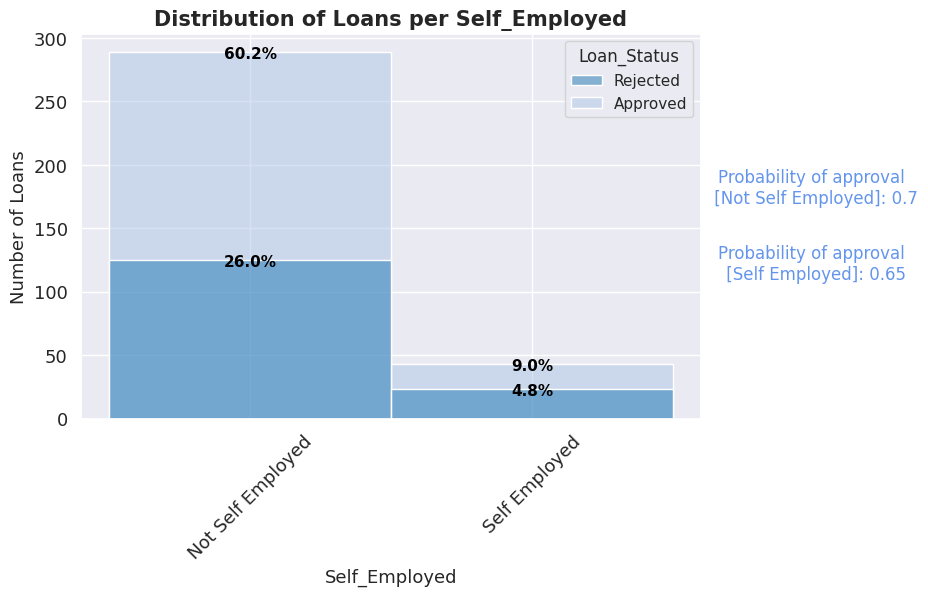

In [ ]:
# Replace Yes(Y) and No(N) with "Approved" and "Rejected" accordingly
loan_data.loc[loan_data['Self_Employed'] == 'Yes', 'Self_Employed'] = 'Self Employed'
loan_data.loc[loan_data['Self_Employed'] == 'No', 'Self_Employed'] = 'Not Self Employed'
plot_stacked_bar(loan_data,'Self_Employed','Loan_Status')

# Add text with a calculation of the loan approval rates
text = f"Probability of approval \n [Not Self Employed]: " + f"{round(60.2/(60.2 + 26.0),2)}"
plt.text(2, 170, text, fontsize=12, ha='center', color='#6495ED')

text = f"Probability of approval \n [Self Employed]: " + f"{round(9.0/(9.0 +  4.8),2)}"
plt.text(2, 110, text, fontsize=12, ha='center', color='#6495ED')

An overwhelming majority, approximately 85.2%, of the applicants are not self-employed, which is substantially higher than the 13.8% of applicants who are self-employed. The graph above suggests that self-employed individuals may have less interest in obtaining loans. However, based on the calculations, the probability of approval for both categories lies between 0.7 and 0.65, indicating a relatively similar loan approval rate regardless of employment status.

**Property_Area -** contains 3 unique categories: "Semiurban", "Urban" and "Rural"

In [ ]:
loan_data['Property_Area'].value_counts() 

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

Text(3.3, 50, 'Probability of approval \n [Semiurban]:0.78')

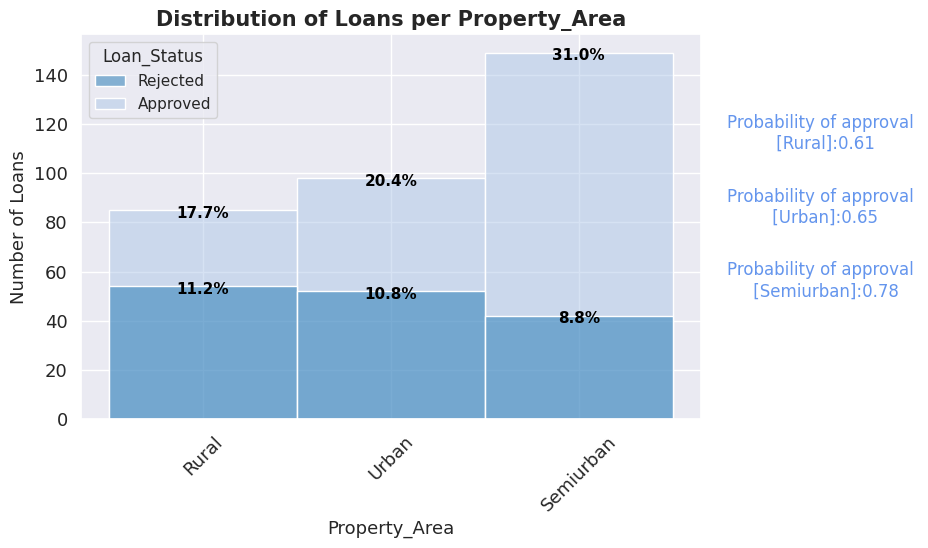

In [ ]:
plot_stacked_bar(loan_data,'Property_Area','Loan_Status')

# Add text with a calculation of the loan approval rates
text = f"Probability of approval \n [Rural]:" + f"{round(17.7/(17.7 + 11.2),2)}"
plt.text(3.3, 110, text, fontsize=12, ha='center', color='#6495ED')

text = f"Probability of approval \n [Urban]:" + f"{round(20.4/(20.4 +  10.8),2)}"
plt.text(3.3, 80, text, fontsize=12, ha='center', color='#6495ED')

text = f"Probability of approval \n [Semiurban]:" + f"{round(31.0/(31.0 +  8.8),2)}"
plt.text(3.3, 50, text, fontsize=12, ha='center', color='#6495ED')

Regarding the preferred property area, 28.9% of all applicants seek to purchase a home in rural areas, 31.2% prefer to live in urban areas, and 39.8%, of applicants are interested in semi-urban properties. Notably, semi-urban areas has the highest probability of approval, thus 0.78.

**ApplicantIncome -** contains 480 positive continuous values. ApplicantIncome is an integer but ought to be a numeric value. 

In [ ]:
# Casting type from int64 to float64
loan_data['ApplicantIncome'] = loan_data['ApplicantIncome'].astype(float)

loan_data['ApplicantIncome'].describe().round(2)

count      480.00
mean      5364.23
std       5668.25
min        150.00
25%       2898.75
50%       3859.00
75%       5852.50
max      81000.00
Name: ApplicantIncome, dtype: float64

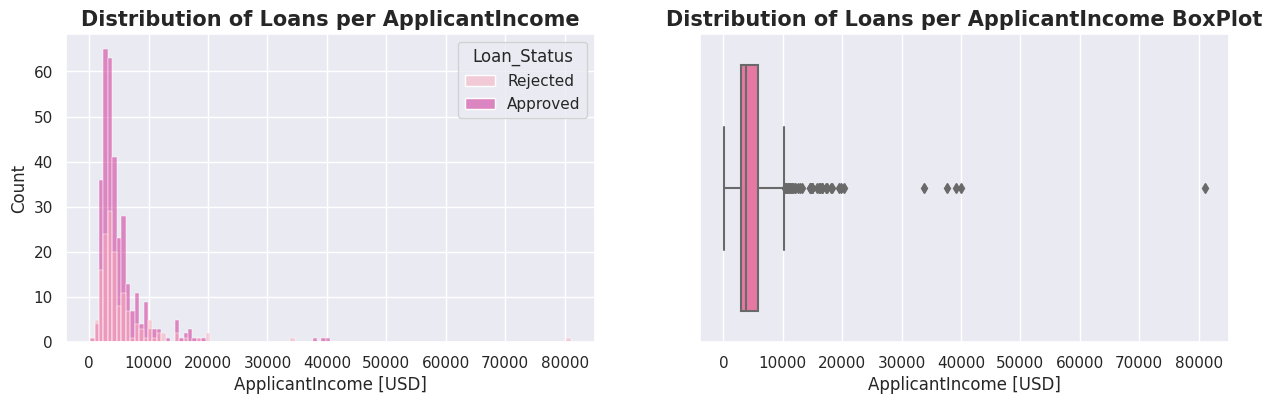

In [ ]:
plot_num(loan_data,'ApplicantIncome','Loan_Status')

Both figures indicates that most of the applicants have an income which ranges between 3000 and 6000 [USD]. Removing the outliers will provided further insights.

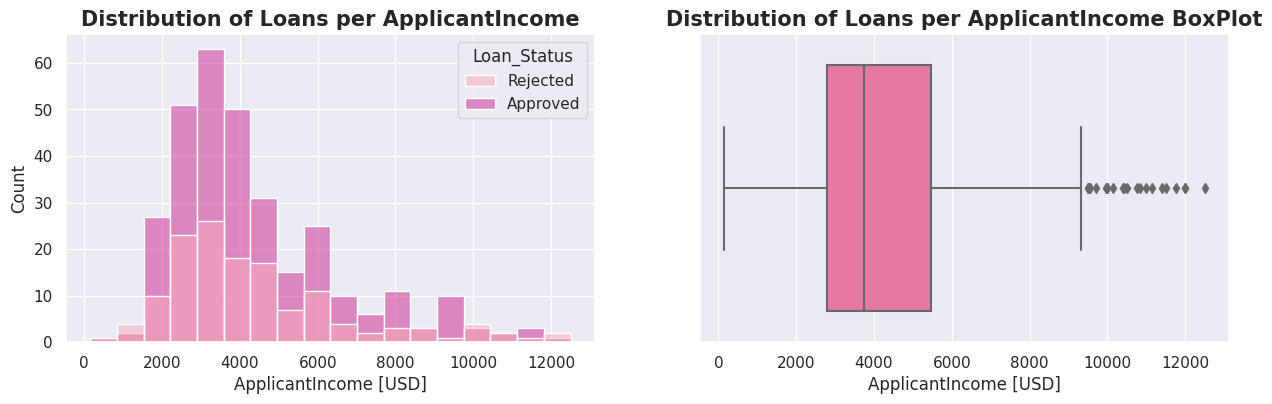

In [ ]:
# def remove_outliers(df,col,lower,upper):
#      df=df[ (df[col]>lower) & (df[col]<upper) ]
#      return df

# loan_data = remove_outliers(loan_data,'ApplicantIncome',0,12500)
plot_num(loan_data[ (loan_data['ApplicantIncome']>=0) & (loan_data['ApplicantIncome']<=12500) ],'ApplicantIncome','Loan_Status')


The highets approval rate corresponds to applicants with income range of (2000 - 4000) [USD].
The Approval/Rejection ratio decreases with an increasing applicant income.
The outliers are applicants with income above 9000 [USD] and loan count less than 10.

**CoapplicantIncome -** contains 480 non-negative continuous values.

In [ ]:
loan_data['CoapplicantIncome'].describe().round(2)

count      480.00
mean      1581.09
std       2617.69
min          0.00
25%          0.00
50%       1084.50
75%       2253.25
max      33837.00
Name: CoapplicantIncome, dtype: float64

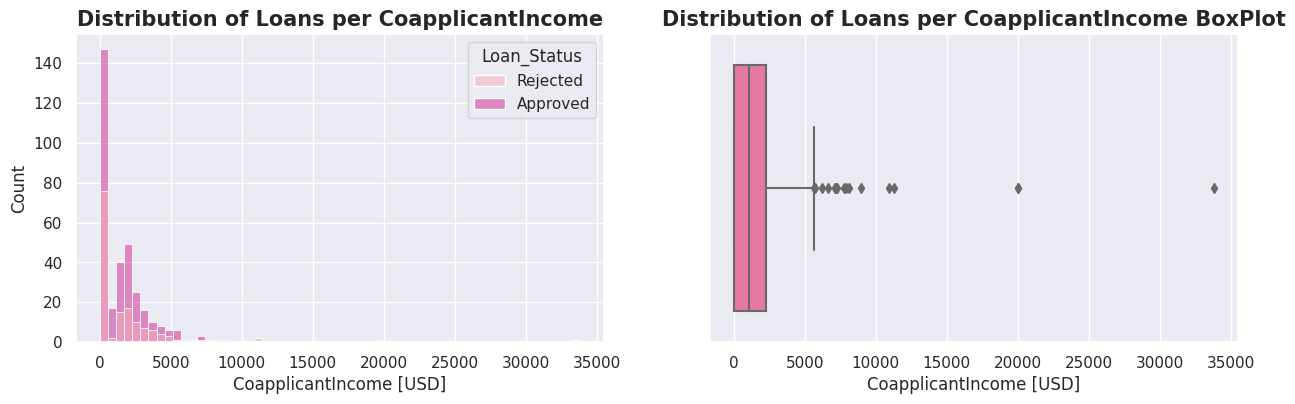

In [ ]:
plot_num(loan_data,'CoapplicantIncome','Loan_Status')

Both figures indicates that most of the applicants have a partner with an income ranging bewteen 0 and 2300 [USD].
The sharp jump where the partner's income is 0 corresponds to most of the unmarried applicants. Removing the outliers will provided further insights

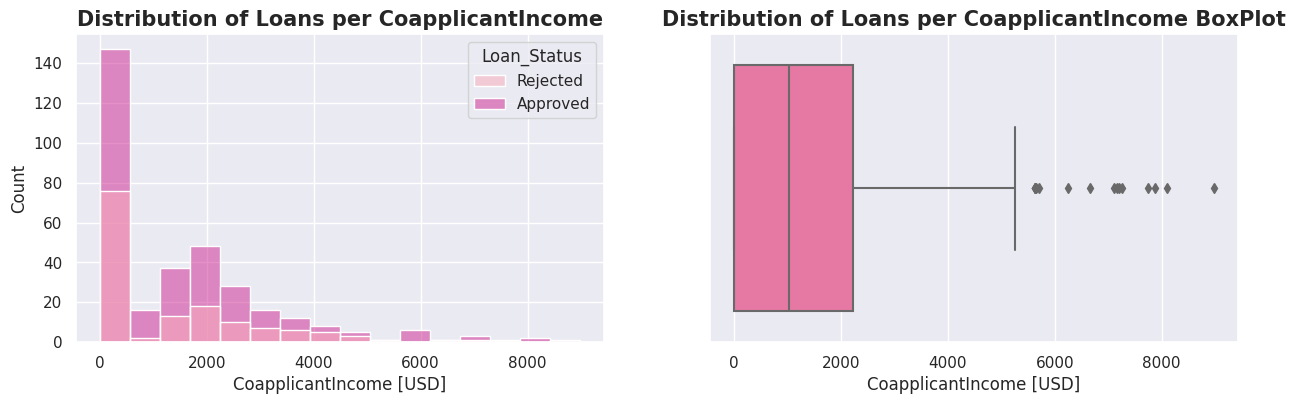

In [ ]:
# loan_data = remove_outliers(loan_data,'CoapplicantIncome',0,10000)
# plot_num(loan_data,'CoapplicantIncome');

plot_num(loan_data[ (loan_data['CoapplicantIncome']>=0) & (loan_data['CoapplicantIncome']<=10000) ],'CoapplicantIncome','Loan_Status')


The highest number of approved loans applies to applicants without a partner or where the partner's income equals to 0 [USD].
When this group is excluded, most of the co-applicants earn between 1000 - 4,500 [USD]. The Approval/Rejection ratio decreases with an increasing applicant income.

**LoanAmount -** contains 480 positive continuous values.

In [ ]:
loan_data['LoanAmount'].describe().round(2)

count    480.00
mean     144.74
std       80.51
min        9.00
25%      100.00
50%      128.00
75%      170.00
max      600.00
Name: LoanAmount, dtype: float64

Multiply by 1000 to show loan amount in [USD] instead of [USD in thousands]

In [ ]:
loan_data['LoanAmount']=loan_data['LoanAmount']*1000

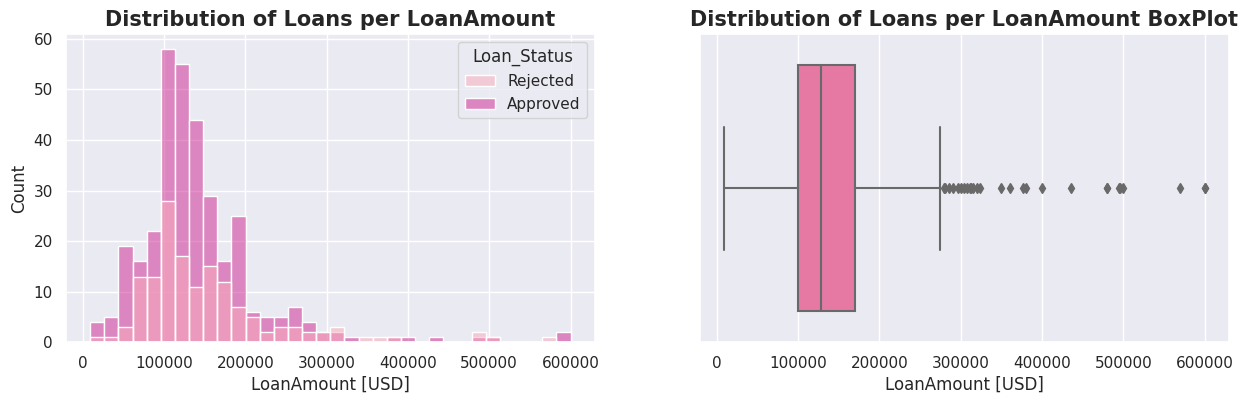

In [ ]:
plot_num(loan_data,'LoanAmount','Loan_Status')

Both figures indicates that the majority of the applications requests loan amounts ranging bewteen 100,000 and 170,000 [USD]. The outliers will be investigated later as a separate category termed as 'Big Loans', hence it shall not be excluded. 

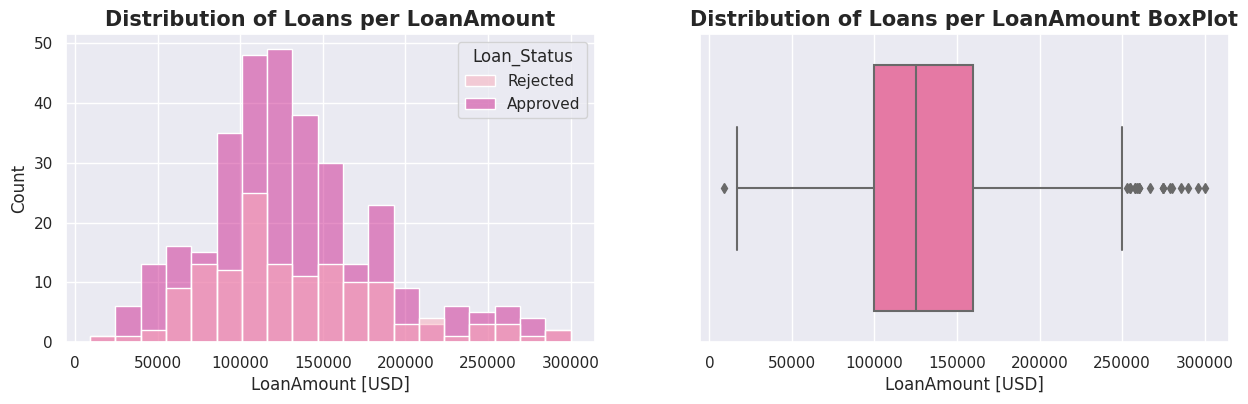

In [ ]:
# loan_data = remove_outliers(loan_data,'LoanAmount',0,300000)
# plot_num(loan_data,'LoanAmount');

plot_num(loan_data[ (loan_data['LoanAmount']>=0) & (loan_data['LoanAmount']<=300000) ],'LoanAmount','Loan_Status')


Loans requests ranging within (83000 - 167000) [USD] have the
highets approval rates. The Approval/Rejection ratio decreases with an increasing applicant income.

**Loan_Amount_Term  -** contains 9 unique discrete values.



In [ ]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: int64

In [ ]:
loan_data['Loan_Amount_Term'].value_counts().count()

9

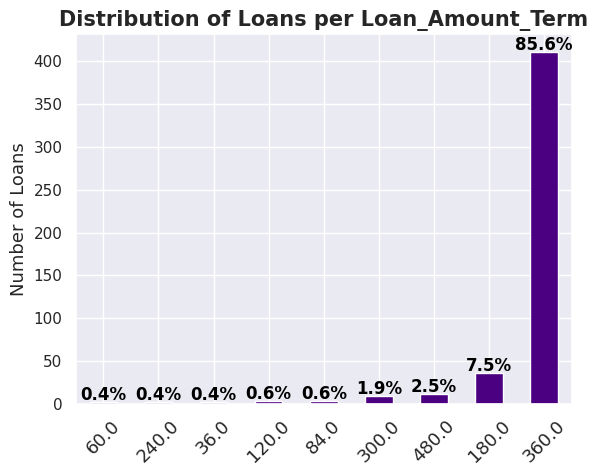

In [ ]:
plot_categ_num(loan_data,'Loan_Amount_Term', None)

The majority, about 85.6%, of the sumbitted applications request Loan Amount Term of 360. The rest of the applications corresponds mainly to Loan Amount Terms of 300, 480 and 180. Applying a threshold of 5 loans at least will provide further insights. 

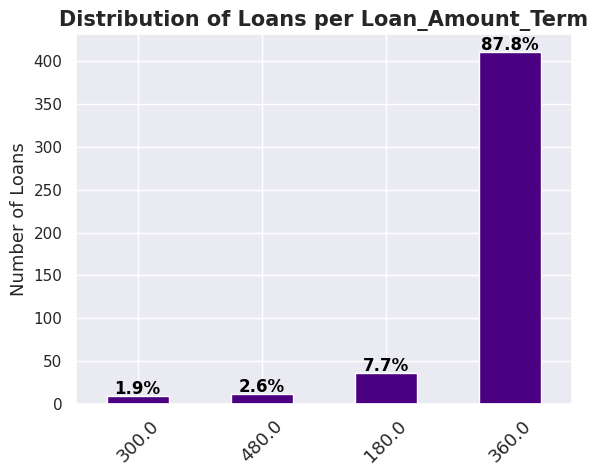

In [ ]:
threshold = 5
counts = loan_data.Loan_Amount_Term.value_counts()
counts
to_drop = counts[counts<threshold].index.tolist()

plot_categ_num(loan_data[~loan_data['Loan_Amount_Term'].isin(to_drop)],'Loan_Amount_Term', None)


Applying a threshold of 5 loans at least for each Loan Amount Term clarify and assure the insights stated previously.

**Credit_History -** contains 2 unique values: "1.0" and "0.0".

In [ ]:
loan_data['Credit_History'].value_counts() 

1.0    410
0.0     70
Name: Credit_History, dtype: int64

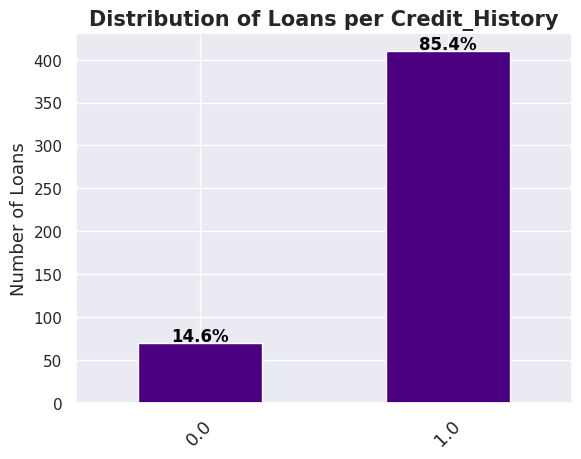

In [ ]:
plot_categ_num (loan_data,'Credit_History', None)

The majority, about 85.4%, of the sumbitted applications corresponds to applicants with Credit History equals to 1.0

#**4. Application**

##**Part 1: Data Visualization (Multivariate Analysis)**

Exploring only the approved loan distribution by the demographics of the applicants utilizing multivariate analysis.

Text(0.5, 1.0, 'Appoved Loans distribution by Demographics')

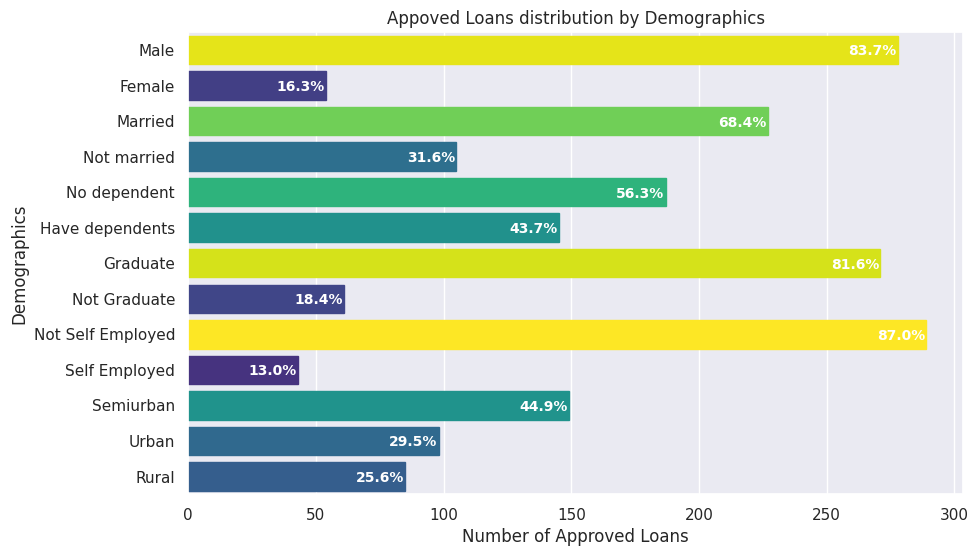

In [ ]:
# Filter the data where 'Loan_Status' is 'Approved'
approved_data = loan_data[loan_data['Loan_Status'] == 'Approved']

# Categorical columns and their unique values
categorical_columns = ['Gender', 'Married', 'Dependency', 'Education', 'Self_Employed', 'Property_Area']

# Initialize an empty DataFrame to store the counts
count_data = pd.DataFrame()

# Iterate over the categorical columns
for column in categorical_columns:
    # Calculate the count of loans for each unique value in the column
    grouped_data = approved_data
    counts = grouped_data[column].value_counts()
    # Add the counts to the count_data DataFrame
    count_data = pd.concat([count_data, counts], axis=1)

# Rename the columns to match the categorical columns
count_data.columns = categorical_columns

# Transpose the count_data DataFrame for plotting
count_data = count_data.T

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.set(style="darkgrid")  # Set the style of the plot

# Calculate the maximum count for scaling the colors
max_count = int(count_data.max().max())

# Create a colormap with the desired color range
cmap = sns.color_palette('viridis', n_colors=max_count)

# Plot the horizontal bar plot
bar_plot = sns.barplot(data=count_data, orient="h")

# Assign colors manually based on the size of the bars
for i, bar in enumerate(bar_plot.containers[0]):
    count = bar.get_width()
    color = cmap[int(count) - 1]
    bar.set_color(color)

# Add percentage annotations to the bars
for p in bar_plot.patches:
    xloc = p.get_width() - 10
    yloc = p.get_y() + p.get_height() / 2
    percentage = format((p.get_width() / counts.sum()), '.1%')
    bar_plot.annotate(percentage, (xloc, yloc), xytext=(0, -1), textcoords='offset points',
                      ha='center', va='center', color='white', size=10, weight='bold')

# Set the labels and title
bar_plot.set_xlabel("Number of Approved Loans")
bar_plot.set_ylabel("Demographics")
bar_plot.set_title("Appoved Loans distribution by Demographics")

The horizontal bar chart provides a visual representation of the distribution of approved loans among different demographic categories. It is evident that the category of not self-employed applicants has the highest likelihood of loan approval, with a staggering percentage of 87%. This suggests that there is a high degree of automatic approval for individuals in this category. Similar patterns can be observed for males, with a loan approval rate of 83.7%, and graduates, with a loan approval rate of 81.6%. These findings highlight the favorable conditions for loan approval within these specific demographic groups.

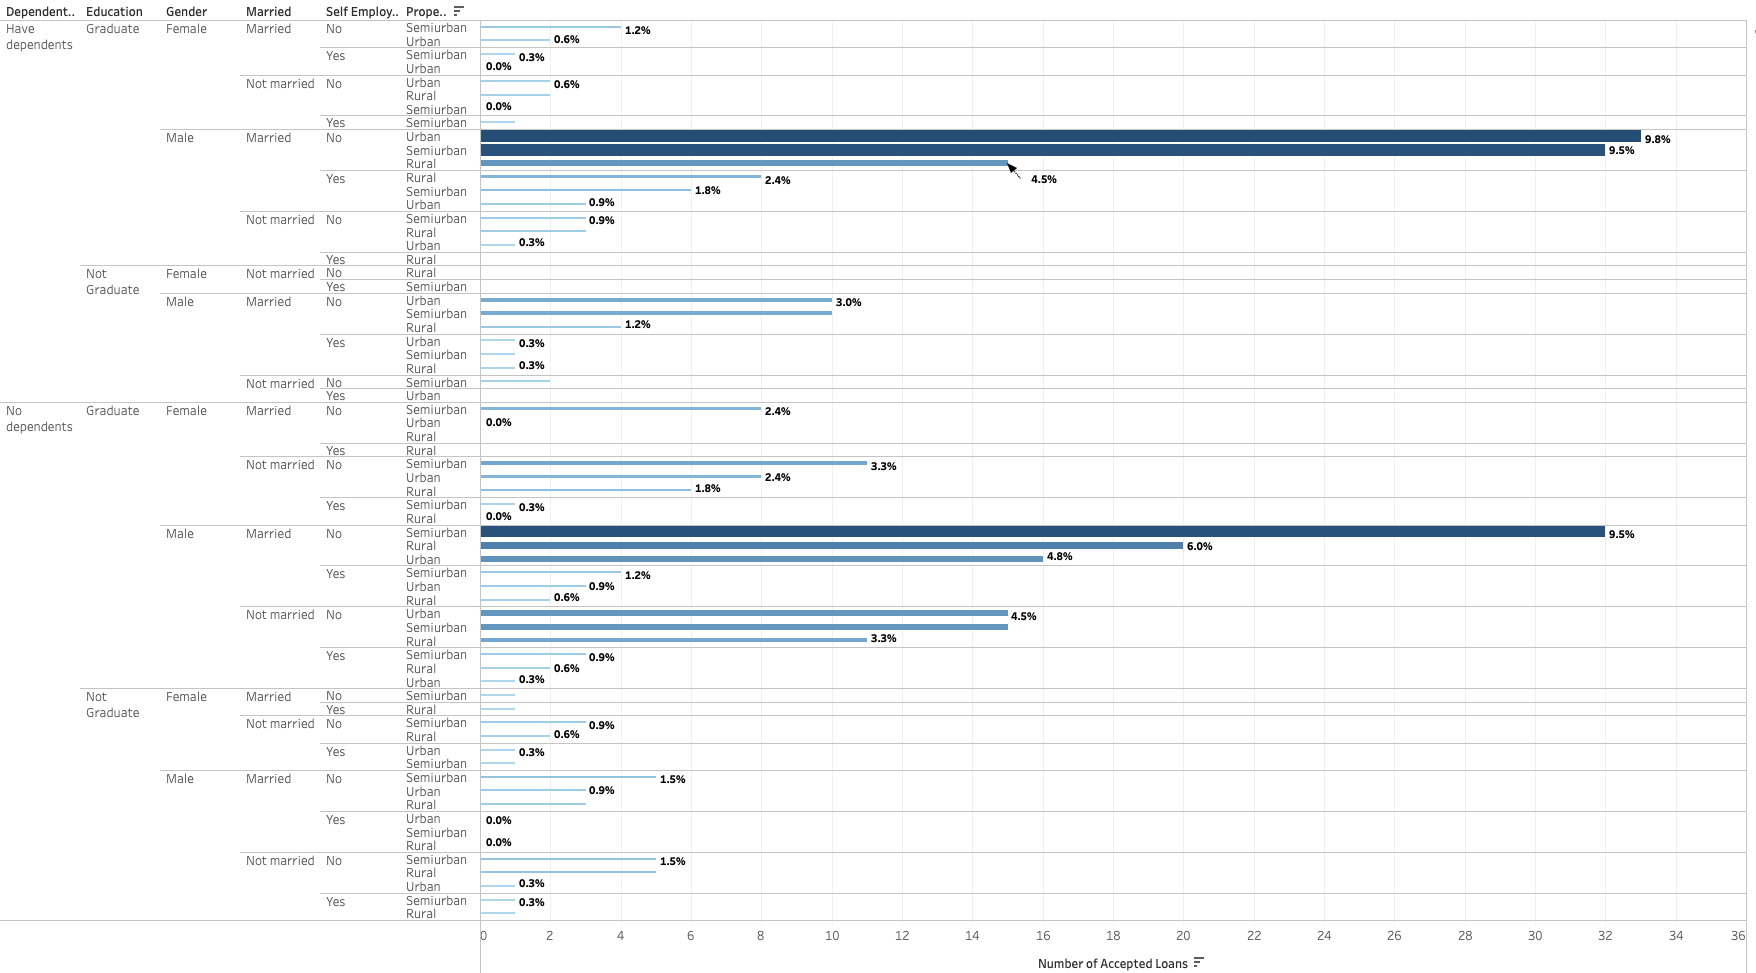

In [ ]:
from PIL import Image

# Make sure the bar chart image (tableau) is uploaded in the Files of this notebook

# Provide the path to your image file in Google Drive
image_path = '/content/BarChart_HomeLoans_EDA_Automation_KaggelProject.png'

# Open the image using PIL
image = Image.open(image_path)

# Display the image
image.show()


**What are the demographics of approved applicants based on the approval rate by the old management?**

By delving into the sub-categories within each demographic group, we can gain further insights into the distribution of approved loans. Building upon the earlier conclusion that married, graduated males who are not self-employed have the highest probability of loan approval, this bar chart reveals that dependency status does not significantly impact loan approval within this group. Both individuals with dependents and those without have an equal percentage of approved loans, amounting to 9.5% each.

Another interesting observation, which was not clearly apparent in the univariate analysis, is that the subgroup of married, graduated males who are not self-employed and have dependents exhibit approximately a similar probability of loan approval when purchasing properties in urban or semi-urban areas. Specifically, the percentage of approved loans for this subgroup is  9.8% for urban properties and 9.5% for semi-urban properties.

As depicted in the figure above, it is evident that married, graduated male applicants who are not self-employed and have dependents exhibit the highest probability of loan approval. This holds true regardless of their dependency status or whether they are purchasing properties in urban or semi-urban areas. 

The combined effect of being married, having a graduate degree, being male, not being self-employed, and having dependents contributes to a consistently higher likelihood of loan approval across different scenarios.

Male graduates tend to have a higher loan approval rating than male non-graduates or female non-graduates. 

The discussed chart was produced utilizing the attached Tableau workbook:
'https://public.tableau.com/views/HomeLoans_EDA_Automation_KaggelProject/BarChart?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link'

**Which property area is preferred by the loan applicants (rural, semi-urban, urban)?**

Properties located in Semiurban areas seem to be the most preferred destination for loan applicants. 
As observed in figure above, 44.9% of the approved loan applicants preferred properties in semi-urban areas. 

Urban areas rank second with 29.5% and rural areas seem to be the least preferred location with the lowest percentage.

Overall, there seem not to be sharp differences regarding the location where loan applications prefer to live. 

**Do Married Individuals request higher loan amounts?**

After discussing with Comfort LLC management board regarding what is termed as a high loan amount,or simply "Big Loan", Management is of the opinion that a high loan amount is 300,000 [USD] and above. Based on this figure, we proceed to find if married or unmarried people request a loan of 300,000 [USD] and above which are considered as Big loans. The figure below shows clearly that married applicants request higher amount loans (Big loans) more than not married applicants.

Text(2.05, 4, 'Probability of approval for \n [Not married] is effectively \n nonexistent.')

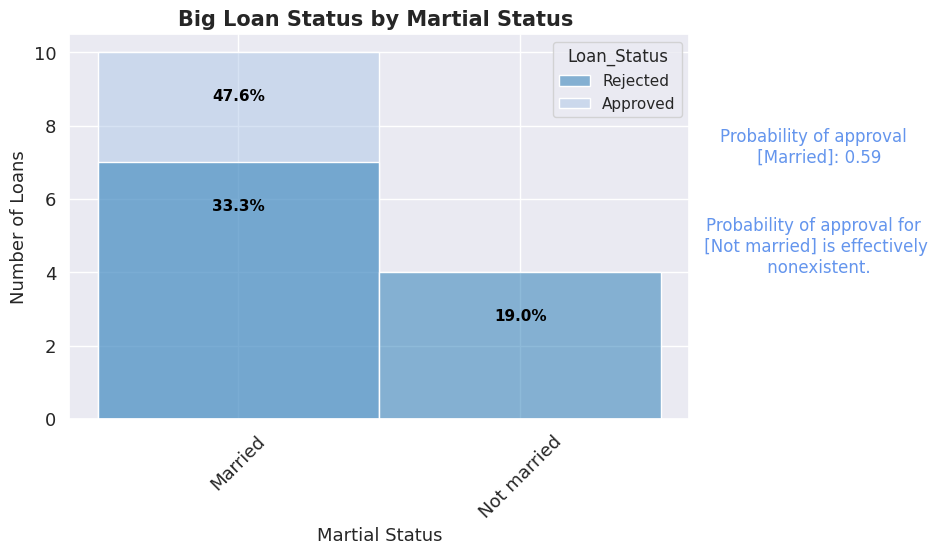

In [ ]:
# Filter for Big Loans
filtered_data = loan_data[loan_data['LoanAmount'] > 300000]
plot_stacked_bar(filtered_data, 'Married', 'Loan_Status')
plt.title('Big Loan Status by Martial Status ', size=15, weight='bold')
plt.xlabel('Martial Status', size=13)


# Add text with a calculation of the loan approval rates
text = f"Probability of approval \n [Married]: " + f"{round(47.6/(47.6 + 33.3),2)}"
plt.text(2.05, 7, text, fontsize=12, ha='center', color='#6495ED')

text = f"Probability of approval for \n [Not married] is effectively \n nonexistent."
plt.text(2.05, 4, text, fontsize=12, ha='center', color='#6495ED')

A significant majority, thus married individuals, account for nearly 81% of all applications for big loans exceeding 300,000 USD. The provided figure clearly illustrates that married individuals have a higher likelihood of receiving big loans, with an approval rate of 59%. However, it is worth noting that their rejection rate is considerably high, at 61%.
Interestingly, unmarried individuals make up 19% of all applicants for big loans. Strikingly, this group has never been approved for big loans, indicating a complete absence of loan approvals within this category.

##**Part 2: Automating Loan Approval Process**



As mentioned earlier, the new management of Comfort LLC has outlined the need for automation to streamline the loan approval process and enhance its efficiency. The primary objective of this task is to reduce operational costs associated with manual loan approvals. By automating the process, the company aims to save time and ensure fairness for all loan applicants.

Moving forward, the company has defined specific criteria for automatic online loan approvals based on a treshold of 6% where only applicants who meet the  criteria that have a higher percentage of approved loans as observed in the horizintal bar chart (Tableau figure) will be approved. 


Therefore, the company will only grant automatic approval for online applicants who are gradute married and not self employed regardless of the property area and irrespective of their dependency status. All other categories of applicants will be rejected and informed to contact the company offices either by phone or in person.


**Python Function to Determine Eligibility of Loan Applicants**

In [ ]:
def check_loan_eligibility(applicant_info):
    """
    Checks loan eligibility based on demographic information of loan applicants.

    Args:
        applicant_info (dict): Dictionary containing applicant information.

    Returns:
        bool: True if the applicant is eligible for a loan, False otherwise.
    """
    Married = applicant_info.get('Married', False)
    Graduate = applicant_info.get('Graduate', False)
    Self_Employed = applicant_info.get('Self_Employed', False)

    if Married and Graduate and not(Self_Employed):
        return print("Congratulations! You are eligible for an online loan. Comfort LLC will contact you shortly.")

    return print("We kindly request that you contact our company offices either by phone or in person, as you are not eligible for an online loan at this time.")




**Testing Automation**

The applicant's marital, educational level and employment status shall always be passed as a dictionary to a certain variable with any name, for example: 'Johnson' or Peter. The function built above shall then accept this name and based on the rules determined in the function, determine loan eligibility. 

We shall now proceed to test the function in Three Scenarios. 

**Scenario 1:** Johnson is a graduate married and not self employed. 

**Scenario 2:** Peter is a graduate married but he is self employed. 

**Scenario 3:** Mary is a graduate that is unmarried and works as an employee. 

In [ ]:
# Testing Johnson's Eligibility. 
Johnson = {
    'Married': True,
    'Graduate': True,
    'Self_Employed': False,
}

check_loan_eligibility(Johnson)  #applying the function to check loan eligibility. 

Congratulations! You are eligible for an online loan. Comfort LLC will contact you shortly.


In [ ]:
# Testing Peter's Eligibility. 
Peter = {
    'Married': True,
    'Graduate': True,
    'Self_Employed': True,
}

check_loan_eligibility(Peter)   #applying the function to check loan eligibility. 

We kindly request that you contact our company offices either by phone or in person, as you are not eligible for an online loan at this time.


In [ ]:
# Testing Mary's Eligibility. 
Mary = {
    'Married': False,
    'Graduate': True,
    'Self_Employed': False,
}

check_loan_eligibility(Mary)     #applying the function to check loan eligibility. 

We kindly request that you contact our company offices either by phone or in person, as you are not eligible for an online loan at this time.


The Python function aimed at determining loan applicant's eligiblity seems to be working perfectly. It shall be integrated into the firm's loan application forms if approved by Management. 

#**5. Analysis**

Exploring the interaction between different categorical variables and their impact on loan approval rates provided valuable insights.

Regarding the demographics of successful loan applicants, the results displays a wide variation in terms of what characterizes these applicants. The results show that there seem to be more males approved for loans than females. While this result may demonstrate some level of gender bias, a deeper analysis may reveal that this might probably just be the case of few females applying for home loans as compared to men. Since most men are deemed as heads of their families and relationships, it is quite normal for men to take the initiative of applying for loans on behalf of their female partners. 

Also, the results show that individuals with no dependants are more succesful at getting loans at Comfort LLC regardless of their marital status. This could be as a result of a number of reasons. It is possible that individuals with no dependents do not request higher loan amounts making it easier for them to get approved as compared to their counterparts with dependants. More analysis is required to identify the exact motive behind this findings.

Regarding marriage, married applicants have been more successful at acquiring loans than unmarried people. These results seem contrary to the results attained with dependency status and loan approvals hence reducing the certainty one can apply to predict the motive behind the case of marital status and loan approvals. For example, both married people and people living with dependents can both be termed as people with family and hence one will expect that variables within the family category will show similar findings. It may be coincidental that married people are offered more loans than unmarried people. Also, it is possible that other factors such as the 'applicant's income' or 'preferrered property area' other than the applicant's marital status predict success with loan approvals. 

Lastly, there seem to be successful loan approvals for people who are graduates as well as not self-employed. If being a grduate and working in a job other than yours predicts success with a loan application, then one can predict that the old management of Comfort LLC may have deemed such applicants as more trustworthy in terms of loan repayment. This case is likely since graduates mostly earn more highly paid jobs than non-graduates. Also, non-self-employed people sometimes have a more stable income than self-employed people hence can be favoured within this group. It is worth mentioning that, further analysis is warranted to accept these results with certainty. 

#**6. Conclusion and Areas for Growth and Future Research**

This data analytics project demonstrates proficiency in the use of Python to conduct exploratory and prescriptive analytics for a financial firm that provides home loans to the general public based on a certain criteria. The project also demonstrates our ability to use Python to write functions that streamlines the loan approvals process of the financial firm, herein as Comfort LLC.

Within the provided dataset, there are several potential areas for growth and future research that can enhance our understanding of loan dynamics in order to improve and sharpen decision-making at Comfort LLC.

In future research, it is necessary to expand the dataset to include additional relevant variables.
For example, incorporating financial metrics debt-to-income ratios, repayment behavior or employment history could provide a more comprehensive understanding of the factors influencing loan approvals. 
Additionally, examining external factors such as economic indicators, interest rates can contribute to a more holistic analysis of loan dynamics.

Exploring the long-term impact of loan approvals and repayment behavior is an area of interest. Investigating factors that contribute to successful loan repayment, such as personalized loan repayment plans, can provide insights into improving overall loan performance and minimizing default rates.

Future research could also focus on utilizing advanced analytical techniques, such as machine learning algorithms or predictive modeling, to improve loan approval predictions. These techniques can help identify patterns, variables, and interactions that traditional statistical approaches may overlook, ultimately leading to more accurate and reliable loan evaluation models.

By delving into these areas for growth and future research, we can advance our understanding of loan dynamics, identify potential biases and contribute to the development of more effective and inclusive loan evaluation frameworks.